Кіріспе

**Деректер жиынының қысқаша сипаттамас**
Бұл жобада біз сатылымдарға байланысты деректер жиынын талдаймыз. Деректер жиыны 500-ден астам жолдардан және 5-тен артық бағандардан тұрады. Оның ішінде сандық (мысалы, сатылым көлемі, жеңілдіктер) және санаттық (өңірлер, өнім санаттары) айнымалылар бар. Сонымен қатар, деректерде кейбір жетіспейтін мәндер мен ауытқулар болуы мүмкін, сондықтан оларды тазарту қажет

**Шешілетін мәле:**
Бұл жобаның негізгі мақсаты — деректерді өңдеу, талдау және визуализациялау арқылы сатылымдардың негізгі тенденцияларын анықтау. Біз сатылымдардың өңірлер мен өнім санаттары бойынша таралуын, жеңілдіктердің сатылымдарға әсерін және қайтарулардың жалпы сатылымдарға қатынасын зерттейміз. Осы арқылы бизнеске пайдалы ақпарат беру және сатылымдарды жақсарту бойынша ұсыныстар жасау жоспарлануда.

In [5]:
#Data Cleaning
import pandas as pd

# Загрузка данных из CSV-файла
df = pd.read_csv("Sales_Project_Dataset.csv")

# Обработка пропущенных значений
df['Sales'] = df['Sales'].fillna(df['Sales'].median())  # Заполнение медианой для столбца продаж
df['Region'] = df['Region'].fillna("Unknown")  # Замена пропущенных регионов значением "Unknown"
df['Discount'] = df['Discount'].fillna(df['Discount'].mean())  # Заполнение среднего значения для скидок

# Удаление дубликатов
df = df.drop_duplicates()

# Преобразование типов данных
df['Date'] = pd.to_datetime(df['Date'])  # Преобразование даты в формат datetime
df['Sales'] = df['Sales'].astype(float)  # Убедимся, что продажи представлены как float
df['Discount'] = df['Discount'].astype(float)  # Скидки также представлены как float

# Выявление и обработка выбросов (outliers) в данных о продажах
q1, q3 = df['Sales'].quantile([0.25, 0.75])  # Первые и третьи квартили
iqr = q3 - q1  # Межквартильный размах
lower_bound = q1 - 1.5 * iqr  # Нижняя граница
upper_bound = q3 + 1.5 * iqr  # Верхняя граница
df['Sales'] = df['Sales'].clip(lower=lower_bound, upper=upper_bound)  # Ограничение выбросов

# Проверка результатов
print("\nОчищенные данные (описательная статистика):")
print(df['Sales'].describe())



Очищенные данные (описательная статистика):
count     500.000000
mean     5249.960000
std       143.675313
min      5000.000000
25%      5126.750000
50%      5251.000000
75%      5373.250000
max      5499.000000
Name: Sales, dtype: float64


Описательная статистика числовых данных:
                                Date        Sales    Discount     Returns  \
count                            505   499.000000  499.000000  505.000000   
mean   2023-09-06 00:57:01.782178304  5250.314629   14.478958    0.499010   
min              2023-01-01 00:00:00  5000.000000    5.000000    0.000000   
25%              2023-05-02 00:00:00  5125.500000    9.500000    0.000000   
50%              2023-09-05 00:00:00  5251.000000   14.000000    0.000000   
75%              2024-01-09 00:00:00  5375.500000   19.000000    1.000000   
max              2024-05-14 00:00:00  5499.000000   24.000000    1.000000   
std                              NaN   144.692248    5.765938    0.500495   

       Return_Ratio  
count    499.000000  
mean       0.000095  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000190  
max        0.000200  
std        0.000095  

Частота транзакций по регионам:
Region
North    134
South    129
W

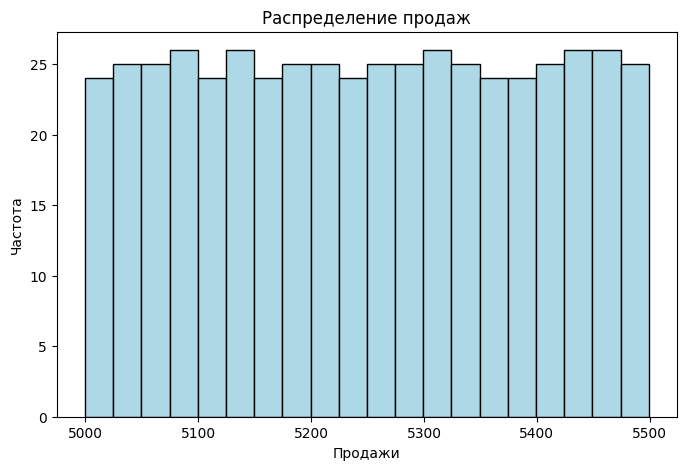

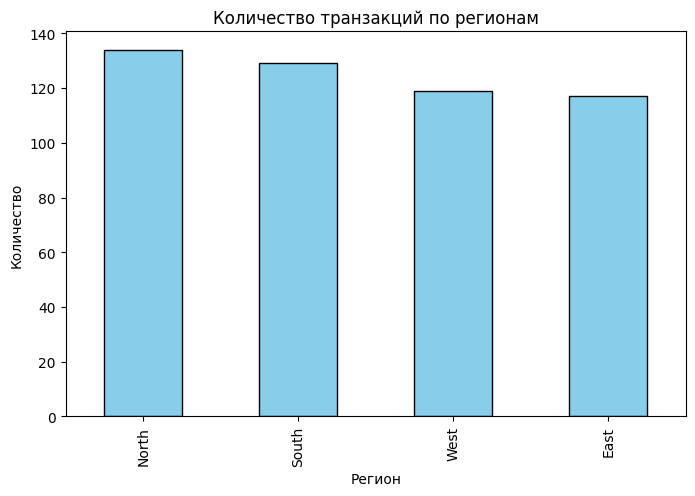

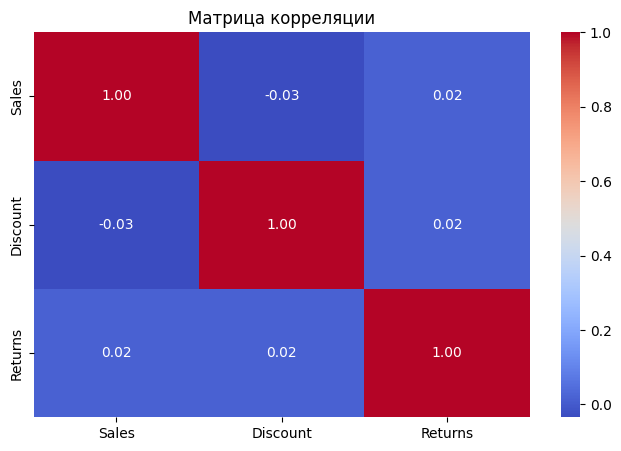


Парный график (Pairplot): Исследование зависимостей между числовыми переменными


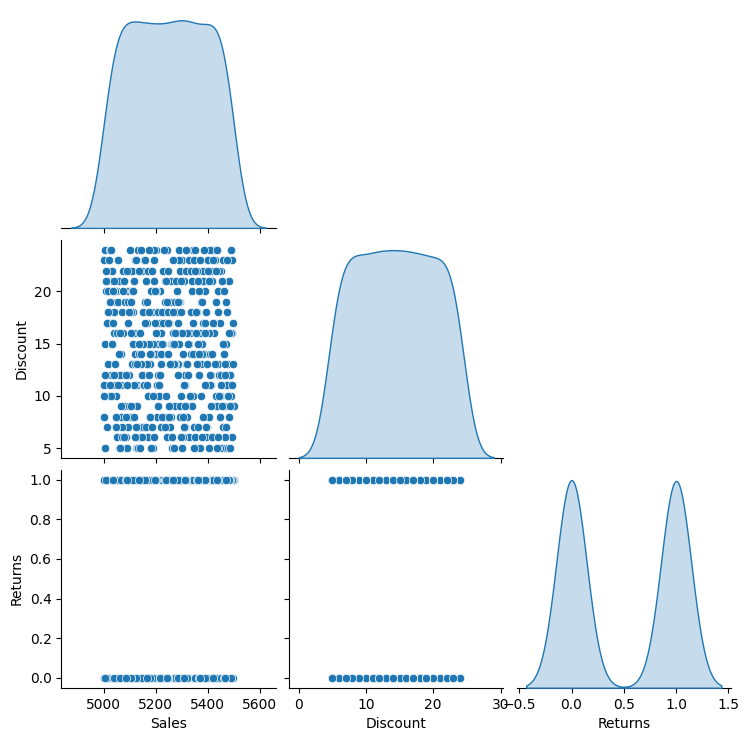

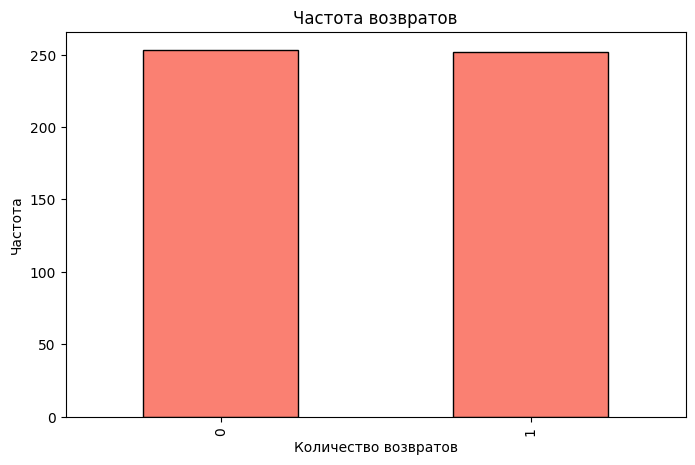

In [19]:
#Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Описательная статистика
summary_stats = df.describe()
print("Описательная статистика числовых данных:")
print(summary_stats)

# Частотный анализ категориальных переменных
region_counts = df['Region'].value_counts()  # Частота по регионам
product_counts = df['Product_Category'].value_counts()  # Частота по категориям продуктов

print("\nЧастота транзакций по регионам:")
print(region_counts)

print("\nЧастота по категориям продуктов:")
print(product_counts)

# Визуализация
# Гистограмма продаж
plt.figure(figsize=(8, 5))
plt.hist(df['Sales'], bins=20, edgecolor='black', color='lightblue')
plt.title('Распределение продаж')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.show()

# Столбчатая диаграмма по регионам
plt.figure(figsize=(8, 5))
region_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Количество транзакций по регионам')
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.show()

# Тепловая карта корреляции
plt.figure(figsize=(8, 5))
correlation_matrix = df[['Sales', 'Discount', 'Returns']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляции')
plt.show()

# Парный график для числовых данных
print("\nПарный график (Pairplot): Исследование зависимостей между числовыми переменными")
sns.pairplot(df[['Sales', 'Discount', 'Returns']], diag_kind='kde', corner=True)
plt.show()

# Анализ возвратов (Returns) - столбчатая диаграмма
plt.figure(figsize=(8, 5))
return_counts = df['Returns'].value_counts()
return_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Частота возвратов')
plt.xlabel('Количество возвратов')
plt.ylabel('Частота')
plt.show()



Добавлен признак 'Sales_per_Discount':
    Sales  Discount  Sales_per_Discount
0  5215.0      10.0          521.500000
1  5496.0       9.0          610.666667
2  5180.0      13.0          398.461538
3  5281.0      19.0          277.947368
4  5102.0      24.0          212.583333

Добавлен признак 'Sales_Level' (динамическая категоризация):
    Sales Sales_Level
0  5215.0      Medium
1  5496.0        High
2  5180.0      Medium
3  5281.0      Medium
4  5102.0         Low


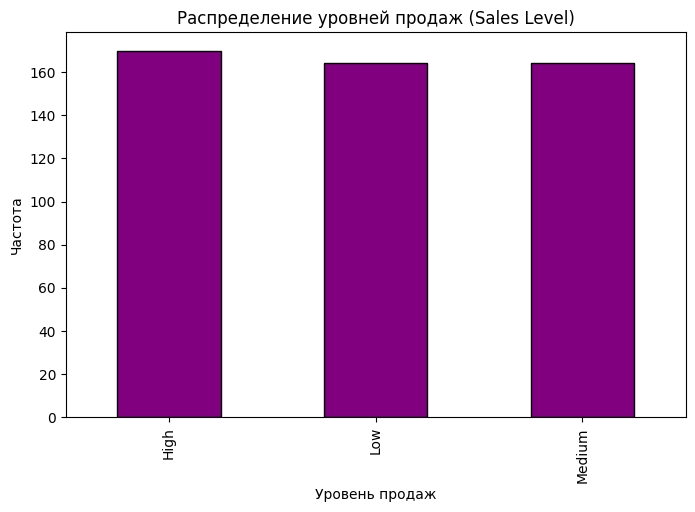


Данные для высокого уровня продаж ('High'):
                                Date        Sales    Discount     Returns  \
count                            170   170.000000  167.000000  170.000000   
mean   2023-09-09 02:57:52.941176576  5415.352941   14.514970    0.500000   
min              2023-01-02 00:00:00  5330.000000    5.000000    0.000000   
25%              2023-05-20 12:00:00  5373.250000   10.000000    0.000000   
50%              2023-09-09 12:00:00  5416.500000   14.000000    0.500000   
75%              2023-12-31 18:00:00  5457.750000   20.000000    1.000000   
max              2024-05-13 00:00:00  5499.000000   24.000000    1.000000   
std                              NaN    49.249565    5.988801    0.501477   

       Return_Ratio  Sales_per_Discount  
count    170.000000          167.000000  
mean       0.000092          462.918302  
min        0.000000          222.666667  
25%        0.000000          267.600000  
50%        0.000091          383.428571  
75%      

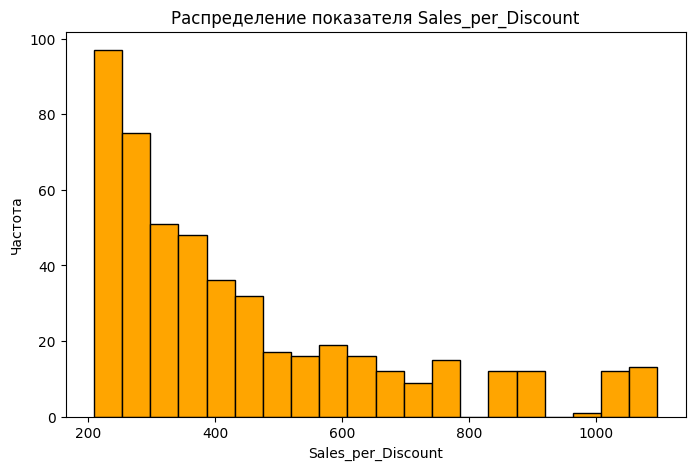

In [14]:
# Data Transformation and Feature Engineering

# Создание нового признака: отношение продаж к скидке
df['Sales_per_Discount'] = df['Sales'] / df['Discount']
print("\nДобавлен признак 'Sales_per_Discount':")
print(df[['Sales', 'Discount', 'Sales_per_Discount']].head())

# Динамическая категоризация данных по уровням продаж
bins = [df['Sales'].min(), df['Sales'].quantile(0.33), df['Sales'].quantile(0.66), df['Sales'].max()]
labels = ['Low', 'Medium', 'High']
df['Sales_Level'] = pd.cut(df['Sales'], bins=bins, labels=labels)
print("\nДобавлен признак 'Sales_Level' (динамическая категоризация):")
print(df[['Sales', 'Sales_Level']].head())

# Визуализация 'Sales_Level'
import matplotlib.pyplot as plt
sales_level_counts = df['Sales_Level'].value_counts()
plt.figure(figsize=(8, 5))
sales_level_counts.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Распределение уровней продаж (Sales Level)')
plt.xlabel('Уровень продаж')
plt.ylabel('Частота')
plt.show()

# Фильтрация данных для высокого уровня продаж
high_sales_df = df[df['Sales_Level'] == 'High']
print("\nДанные для высокого уровня продаж ('High'):")
print(high_sales_df.describe())  # Полная статистика

# Группировка данных по регионам и расчет средней продажи
avg_sales_by_region = df.groupby('Region')['Sales'].mean().reset_index()
print("\nСредние продажи по регионам:")
print(avg_sales_by_region)

# Сортировка данных по отношению продаж к скидке
sorted_df = df.sort_values(by='Sales_per_Discount', ascending=False)
print("\nТоп-5 записей по 'Sales_per_Discount':")
print(sorted_df[['Sales', 'Discount', 'Sales_per_Discount']].head())

# Визуализация 'Sales_per_Discount'
plt.figure(figsize=(8, 5))
plt.hist(df['Sales_per_Discount'], bins=20, edgecolor='black', color='orange')
plt.title('Распределение показателя Sales_per_Discount')
plt.xlabel('Sales_per_Discount')
plt.ylabel('Частота')
plt.show()



Категоризация скидок ('Discount_Level'):
   Discount Discount_Level
0      10.0         Medium
1       9.0            Low
2      13.0         Medium
3      19.0           High
4      24.0           High

Рассчитан 'Return_Ratio':
    Sales  Returns  Return_Ratio
0  5215.0        0      0.000000
1  5496.0        1      0.000182
2  5180.0        0      0.000000
3  5281.0        1      0.000189
4  5102.0        0      0.000000

Pivot Table (Средние продажи по регионам и категориям продуктов):
Product_Category     Clothing  Electronics    Furniture    Groceries  \
Region                                                                 
East              5268.812500  5284.857143  5192.391304  5237.437500   
North             5266.100000  5210.870968  5265.540541  5248.472222   
South             5215.583333  5253.206897  5274.111111  5256.571429   
West              5280.225806  5242.612903  5252.000000  5228.777778   
Overall Average   5256.069767  5246.865546  5249.626087  5243.846154   


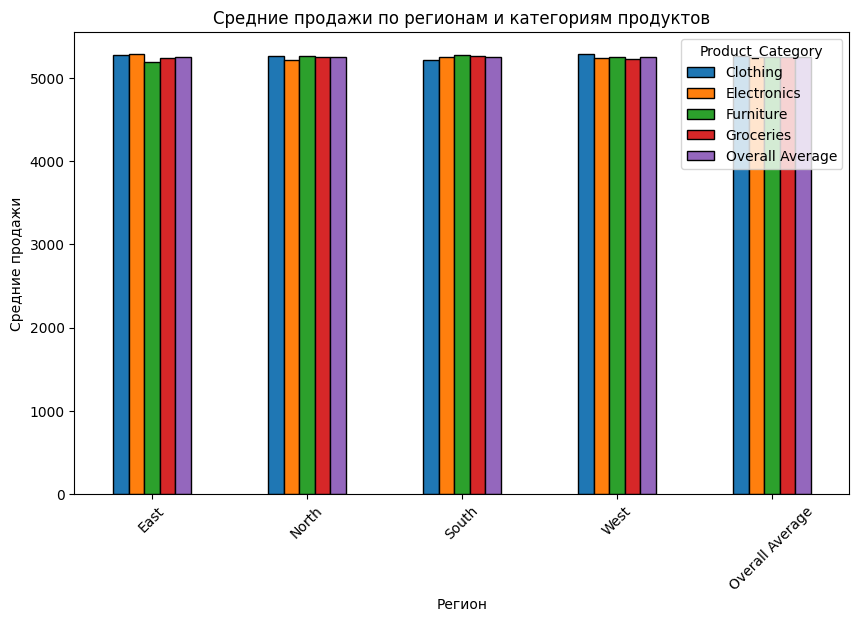


Ежемесячные продажи:
Date
2023-01-31    131761.0
2023-02-28    146847.0
2023-03-31    162600.0
2023-04-30    184238.0
2023-05-31    163690.0
2023-06-30    156966.0
2023-07-31    163154.0
2023-08-31    162267.0
2023-09-30    157945.0
2023-10-31    163087.0
2023-11-30    157270.0
2023-12-31    162457.0
2024-01-31    162767.0
2024-02-29    151491.0
2024-03-31    162368.0
2024-04-30    157761.0
2024-05-31     73238.0
Freq: ME, Name: Sales, dtype: float64


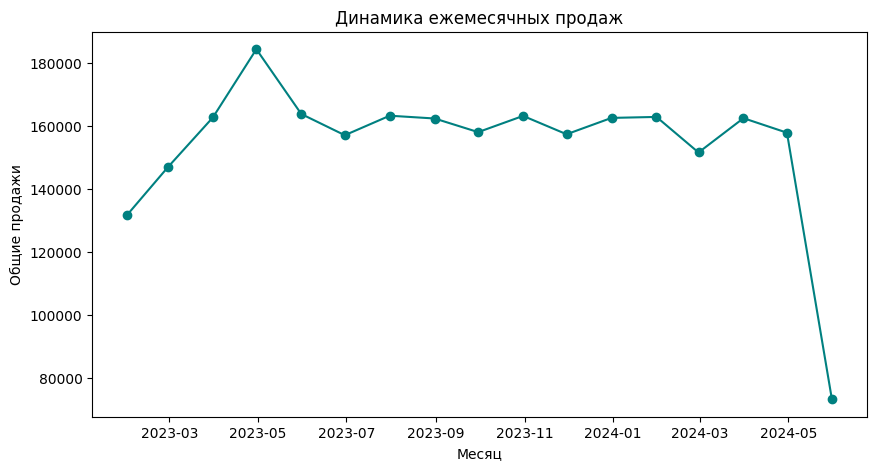

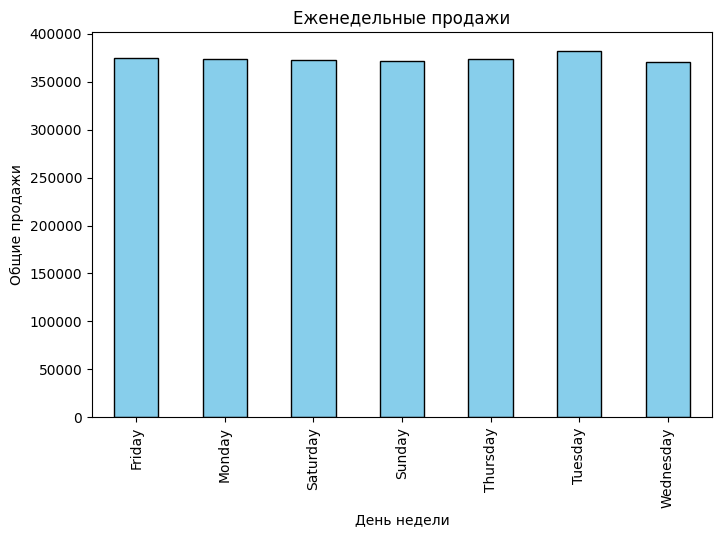

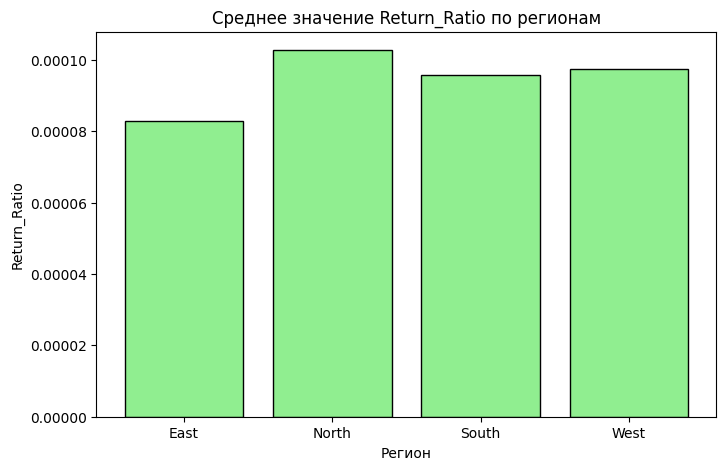

In [22]:
#Advanced Pandas Features (Using apply())

# 1. Использование custom functions с apply()
def categorize_discount(discount):
    if discount < 10:
        return "Low"
    elif 10 <= discount < 15:
        return "Medium"
    else:
        return "High"

# Применение функции categorize_discount
df['Discount_Level'] = df['Discount'].apply(categorize_discount)
print("\nКатегоризация скидок ('Discount_Level'):")
print(df[['Discount', 'Discount_Level']].head())

# Расчет Return Ratio через apply()
df['Return_Ratio'] = df.apply(lambda row: row['Returns'] / (row['Sales'] + 1), axis=1)  
print("\nРассчитан 'Return_Ratio':")
print(df[['Sales', 'Returns', 'Return_Ratio']].head())

# 2. Pivot Table для обобщения данных
pivot_table = df.pivot_table(
    values='Sales',
    index='Region',
    columns='Product_Category',
    aggfunc='mean',
    margins=True,
    margins_name='Overall Average'
)
print("\nPivot Table (Средние продажи по регионам и категориям продуктов):")
print(pivot_table)

# Визуализация Pivot Table(сводная таблица)
pivot_table.plot(kind='bar', figsize=(10, 6), edgecolor='black')
plt.title('Средние продажи по регионам и категориям продуктов')
plt.xlabel('Регион')
plt.ylabel('Средние продажи')
plt.xticks(rotation=45)
plt.show()

# 3. Time-series analysis
# Ежемесячные продажи (Month-End Intervals)
monthly_sales = df.resample('ME', on='Date')['Sales'].sum()
print("\nЕжемесячные продажи:")
print(monthly_sales)

# Визуализация ежемесячных продаж
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='teal')
plt.title('Динамика ежемесячных продаж')
plt.xlabel('Месяц')
plt.ylabel('Общие продажи')
plt.show()

# Анализ еженедельных продаж
df['Weekday'] = df['Date'].apply(lambda x: x.strftime('%A'))  # Добавление дня недели
weekday_sales = df.groupby('Weekday')['Sales'].sum()
weekday_sales = weekday_sales.sort_index()  # Упорядочивание дней недели

# Визуализация еженедельных продаж
plt.figure(figsize=(8, 5))
weekday_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Еженедельные продажи')
plt.xlabel('День недели')
plt.ylabel('Общие продажи')
plt.show()

# Визуализация Return Ratio по регионам
return_ratio_by_region = df.groupby('Region')['Return_Ratio'].mean().reset_index()
plt.figure(figsize=(8, 5))
plt.bar(return_ratio_by_region['Region'], return_ratio_by_region['Return_Ratio'], color='lightgreen', edgecolor='black')
plt.title('Среднее значение Return_Ratio по регионам')
plt.xlabel('Регион')
plt.ylabel('Return_Ratio')
plt.show()


Қысқаша қорытынды:
Data Cleaning:

Пропущенные мәндер медиана, орташа мәндермен және "Unknown" сияқты арнайы категориялармен толтырылды.
Уақыттық деректер (Date) дұрыс форматқа (datetime) түрлендіріліп, деректердегі қайталанатын жолдар жойылды.
Сатылым деректеріндегі (Sales) ауытқулар межквартильдік диапазон (IQR) арқылы анықталып, шектен тыс мәндер жойылды.


Exploratory Data Analysis (EDA):

Сатылымдардың таралуы, өңірлер мен өнім санаттары бойынша транзакциялардың жиілігі зерттелді.
Корреляция матрицасы арқылы негізгі айнымалылар арасындағы байланыстар талданды.
Гистограммалар, бағаналы диаграммалар және парлық графиктер арқылы деректердің негізгі ерекшеліктері визуализацияланды.


Data Transformation and Feature Engineering:

Жаңа көрсеткіштер қосылды:
Sales_per_Discount (сатылымдардың жеңілдіктерге қатынасы).
Sales_Level (сатылымдарды санаттарға бөлу).
Өңірлер бойынша сатылымдардың орташа мәні топтық талдау арқылы есептелді.
Ең тиімді сатылымдарды анықтау үшін деректер арнайы көрсеткіштер бойынша сұрыпталды.


Advanced Pandas Features:

apply() арқылы жеңілдіктер санаттарға бөлініп, қайтару коэффициенті (Return_Ratio) есептелді.
Сводная таблица (pivot_table) арқылы өңірлер мен өнім санаттары бойынша сатылымдар талданды.
Уақыттық деректерді талдау нәтижесінде ай сайынғы сатылымдар динамикасы мен апта күндері бойынша сатылымдардың таралуы зерттелді.
Жалпы:
Бұл талдау сатылымдар, жеңілдіктер және қайтарулар бойынша деректердің негізгі тенденцияларын анықтауға, өңірлер мен өнім санаттарының тиімділігін бағалауға және уақыттық трендтерді зерттеуге мүмкіндік берді. Бұл нәтижелер бизнестің өнімділігін жақсарту бойынша нақты шешімдер қабылдауға негіз бола алады.

